In [1]:
#movie_metadata
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
pd.options.display.mpl_style = 'default'
import pyspark  
from pyspark.sql import SQLContext

In [2]:
sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)

In [54]:
#Chargement du dataset movie_metadata.csv
CV_data = sqlContext.read.load('movie_metadata.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

CV_data.cache()
#suppressions des lignes ayant des data manquantes
CV_data=CV_data.fillna(0)
#Connaitre la structure du dataset(type de chacun des parametres)
CV_data.printSchema()

root
 |-- color: string (nullable = true)
 |-- director_name: string (nullable = true)
 |-- num_critic_for_reviews: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- director_facebook_likes: integer (nullable = true)
 |-- actor_3_facebook_likes: integer (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_1_facebook_likes: integer (nullable = true)
 |-- gross: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- movie_title: string (nullable = true)
 |-- num_voted_users: integer (nullable = true)
 |-- cast_total_facebook_likes: integer (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- facenumber_in_poster: integer (nullable = true)
 |-- plot_keywords: string (nullable = true)
 |-- movie_imdb_link: string (nullable = true)
 |-- num_user_for_reviews: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- country: string (nullable = true)
 |-- content_rati

In [55]:
#CV_data.head()

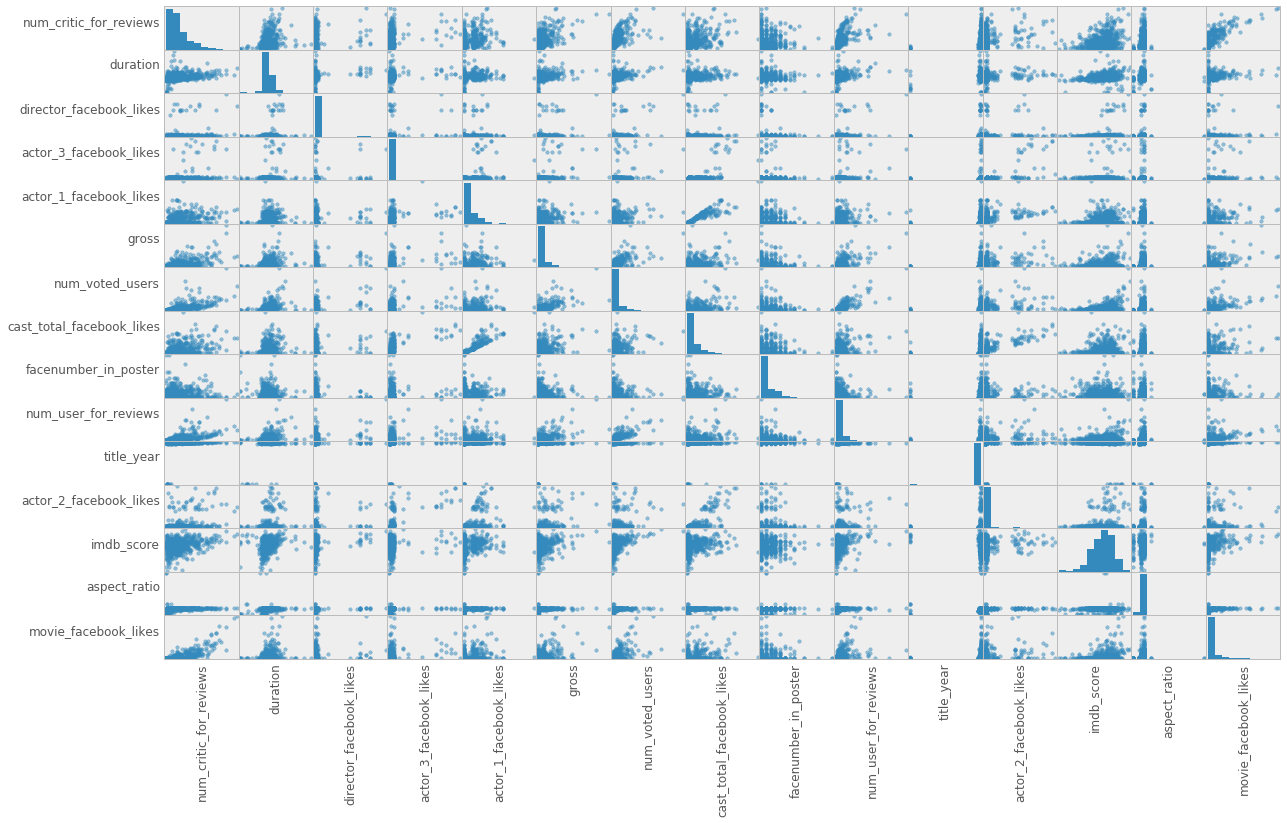

In [64]:
#Selection de toutes les variables  numeriques
numeric_features = [t[0] for t in CV_data.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = CV_data.select(numeric_features).sample(False, 0.10).toPandas()

axs = pd.scatter_matrix(sampled_data, figsize=(20, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Coorelation de pearson entre toutes les variables continues .

In [65]:
sampled_data.corr(method='pearson')

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.301437,0.217415,0.283820,0.346565,0.573965,0.646240,0.399212,-0.052450,0.588728,0.142075,0.343742,0.321522,0.103062,0.760958
duration,0.301437,1.000000,0.246291,0.169580,0.194578,0.279185,0.335713,0.220941,-0.097833,0.388451,0.265383,0.181277,0.278768,0.117987,0.220803
director_facebook_likes,0.217415,0.246291,1.000000,0.196345,0.124478,0.295031,0.468194,0.182686,-0.083280,0.388824,0.029077,0.194718,0.202791,0.020834,0.146117
actor_3_facebook_likes,0.283820,0.169580,0.196345,1.000000,0.370023,0.369879,0.356279,0.635285,0.000731,0.339936,0.035312,0.695750,0.084407,0.019368,0.221870
actor_1_facebook_likes,0.346565,0.194578,0.124478,0.370023,1.000000,0.307045,0.338775,0.930040,0.022566,0.276454,0.046549,0.492904,0.141803,0.048932,0.262363
gross,0.573965,0.279185,0.295031,0.369879,0.307045,1.000000,0.662378,0.408721,-0.043201,0.633980,0.086595,0.384405,0.181834,0.055807,0.466982
num_voted_users,0.646240,0.335713,0.468194,0.356279,0.338775,0.662378,1.000000,0.429965,-0.048380,0.833074,0.057187,0.414474,0.420658,0.053140,0.540481
cast_total_facebook_likes,0.399212,0.220941,0.182686,0.635285,0.930040,0.408721,0.429965,1.000000,0.026656,0.367560,0.054110,0.752701,0.153686,0.049657,0.301515
facenumber_in_poster,-0.052450,-0.097833,-0.083280,0.000731,0.022566,-0.043201,-0.048380,0.026656,1.000000,-0.078730,-0.004021,0.019318,-0.056055,-0.053442,-0.008767
num_user_for_reviews,0.588728,0.388451,0.388824,0.339936,0.276454,0.633980,0.833074,0.367560,-0.078730,1.000000,0.065601,0.349999,0.296291,0.060115,0.379273


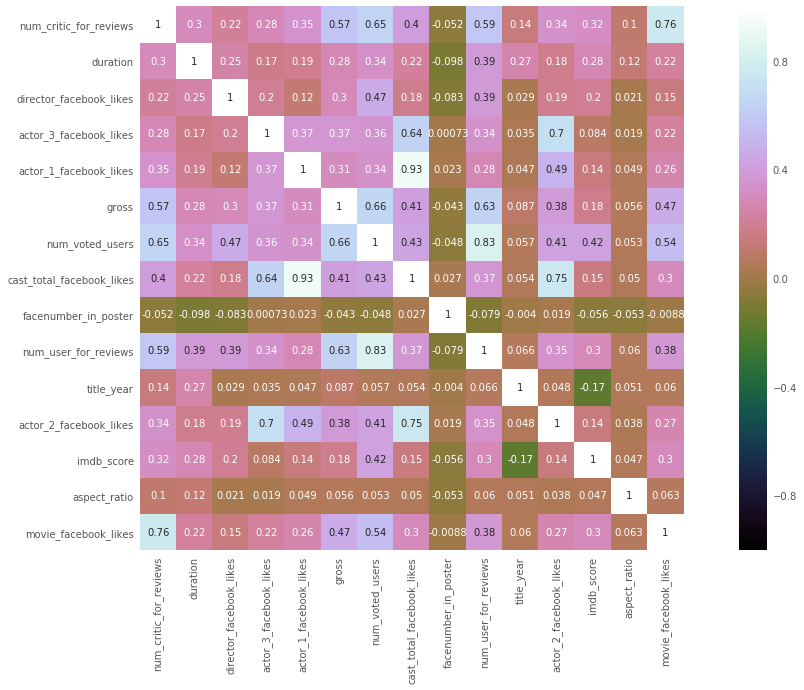

In [66]:
corr_mat=sampled_data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

Grace à cette matrice de coorelation il est flagrant que le nombre de likes facebook n'a presque pas 
influence sur le score d'imdb . 
En plus de cela bcps de films contenu dans le dataset sontg sortie avant l'apparition et la vulgarisation de facebook. 
Donc nous allons générer une nouvelle matrice de correlation sur les films qui sont sorties apres 2010

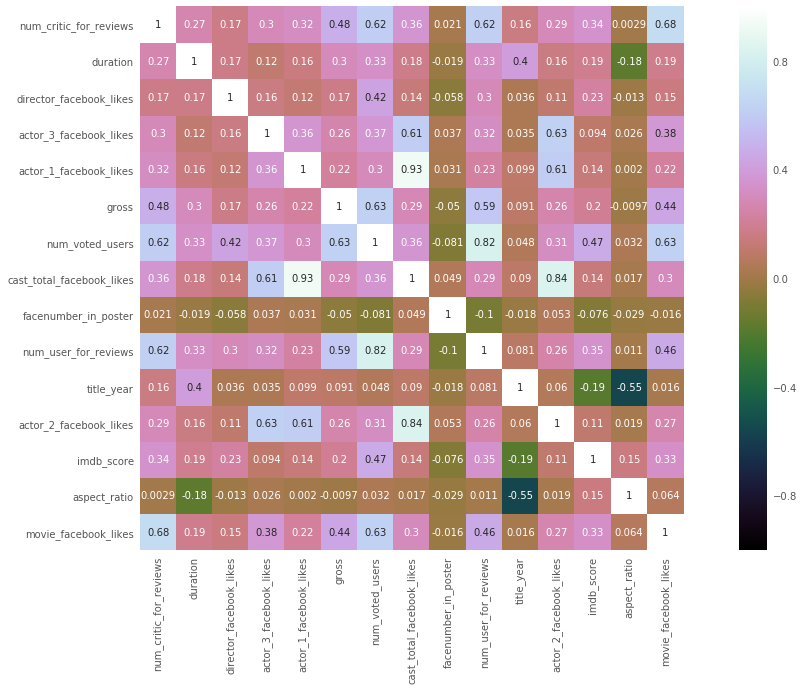

In [59]:
#supreesion film pré-2010
CV_data = CV_data.drop(CV_data['title_year'] < 2010)
numeric_features = [t[0] for t in CV_data.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = CV_data.select(numeric_features).sample(False, 0.10).toPandas()
#matrice de coorélation sur les films post 2010
corr_mat=sampled_data.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

Apres avoir fait le traitement sur les données post-2010 uniquement on remarque:
Que la coorelation entre le score imdb et le nombre de like facebook reste très faible.
Par contre la coorelation entre le nombre de like facebook et Gross a augmenté considérablement ce qui prouve que le nombre de like facebook a en géneral une influence positif sur les rentrées d'argents.

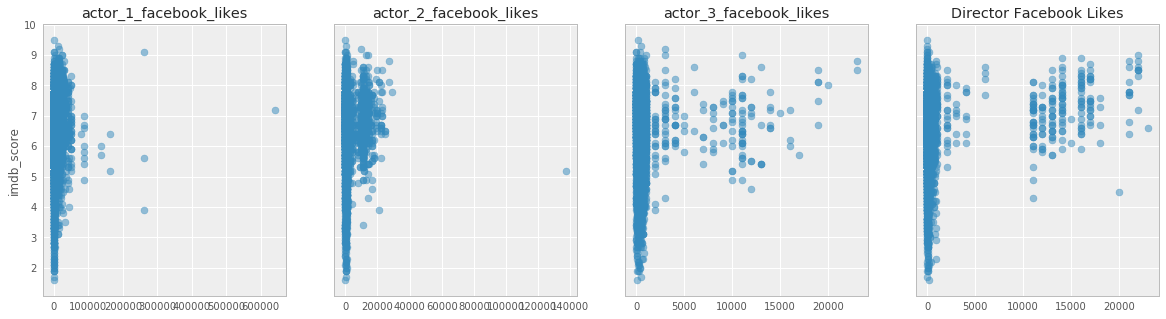

In [60]:
CV_data = sqlContext.read.load('movie_metadata.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

CV_data.cache()
CV_data=CV_data.fillna(0)
Y= CV_data.select('imdb_score').toPandas()
figure, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey = True, figsize = (20, 5))
ax1.scatter(CV_data.select('actor_1_facebook_likes').toPandas(), Y, alpha = 0.5)
ax2.scatter(CV_data.select('actor_2_facebook_likes').toPandas(), Y, alpha = 0.5)
ax3.scatter(CV_data.select('actor_3_facebook_likes').toPandas(), Y, alpha = 0.5)
ax4.scatter(CV_data.select('director_facebook_likes').toPandas(), Y, alpha = 0.5)

ax1.set_ylabel('imdb_score')
ax1.set_title('actor_1_facebook_likes')
ax2.set_title('actor_2_facebook_likes')
ax3.set_title('actor_3_facebook_likes')
ax4.set_title('Director Facebook Likes')


On a ici une representation des variables relevant du domaine des facebook likes en fonctions de la notes reçu sur imdb. ant 
Il est flagrant que l'influence est très faible ( presque inexistante) .

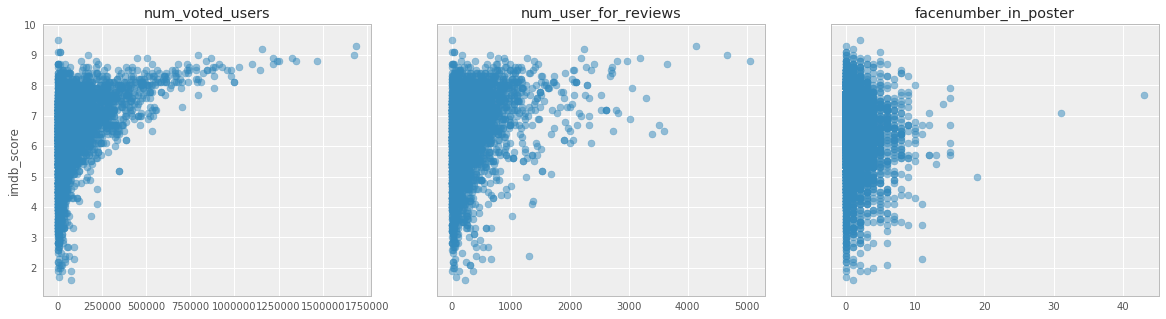

In [61]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (20, 5))
ax1.scatter(CV_data.select('num_voted_users').toPandas(), Y, alpha = 0.5)
ax2.scatter(CV_data.select('num_user_for_reviews').toPandas(), Y, alpha = 0.5)
ax3.scatter(CV_data.select('facenumber_in_poster').toPandas(), Y, alpha = 0.5)

ax1.set_ylabel('imdb_score')
ax1.set_title('num_voted_users')
ax2.set_title('num_user_for_reviews')
ax3.set_title('facenumber_in_poster')


Ici nous avons :
Une representation du nombre de votant en fonction de la note imdb ( coorelation forte)
Une representation du nombre d'utilisateur ayant emis une critique en fonction de la note imdb ( coorelation forte)
Une representation du nombre de visages sur l'affiche du film en fonction de la note imdb ( coorelation faible ) 


# coorelation with linear model (LinearRegression)
num_voted_users et num_users_for_reviews cooreler


In [62]:
numeric_features = ['budget', 'duration', 'title_year', 'num_critic_for_reviews',
                    'num_voted_users', 'facenumber_in_poster']
sampled_data_x = CV_data.select(numeric_features).toPandas()
sampled_data_y = CV_data.select('imdb_score').toPandas()

In [63]:
from sklearn.model_selection import train_test_split
# train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(sampled_data_x, sampled_data_y, test_size=0.3, random_state=42)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression_model = LinearRegression()
regression_model=regression_model.fit(x_train, y_train)
y_predict=regression_model.predict(x_test)
score=r2_score(y_test, y_predict) 
print("score is :",score)


score is : 0.119206241321


# Recursive feature elimination (RFE) linear model (LinearRegression)


In [68]:
data=CV_data
numeric_features = ['budget', 'duration', 'title_year', 'num_critic_for_reviews',
                    'num_voted_users', 'facenumber_in_poster','actor_3_facebook_likes','actor_2_facebook_likes',
                   'actor_1_facebook_likes','movie_facebook_likes','aspect_ratio','director_facebook_likes'
                   ,'num_user_for_reviews']
sampled_data_y = data.select('imdb_score').toPandas()
sampled_data_x = data.select(numeric_features).toPandas()
x_train, x_test, y_train, y_test = train_test_split(sampled_data_x, sampled_data_y, test_size=0.3, random_state=42)

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
rfe = RFE(estimator=regression_model, step=1)
rfe = rfe.fit(x_train, y_train)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', x_train.columns[rfe.support_])      

Optimal number of features : 6
Best features : Index(['duration', 'title_year', 'num_critic_for_reviews',
       'facenumber_in_poster', 'aspect_ratio', 'num_user_for_reviews'],
      dtype='object')


# Recursive feature elimination with cross validation and LinearRegression

In [70]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
rfe = RFECV(estimator=regression_model,step=1, cv=5)
rfe = rfe.fit(x_train, y_train)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', x_train.columns[rfe.support_]) 

Optimal number of features : 9
Best features : Index(['duration', 'title_year', 'num_critic_for_reviews', 'num_voted_users',
       'facenumber_in_poster', 'actor_3_facebook_likes', 'aspect_ratio',
       'director_facebook_likes', 'num_user_for_reviews'],
      dtype='object')


# coorelation with (RandomForestClassifier)

In [71]:
numeric_features = ['budget', 'duration', 'title_year', 'num_critic_for_reviews',
                    'num_voted_users', 'facenumber_in_poster']
sampled_data_x = CV_data.select(numeric_features).toPandas()
import numpy as np
sampled_data_y = np.asarray(CV_data.select('imdb_score').toPandas(), dtype="|S6")
from sklearn.model_selection import train_test_split
# train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(sampled_data_x, sampled_data_y, test_size=0.3, random_state=42)

In [72]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier=RandomForestClassifier.fit(x_train, y_train)
y_predict=RandomForestClassifier.predict(x_test)
score=accuracy_score(y_test, y_predict) 
print("score is :",score)

score is : 0.0806345009914


# Recursive feature elimination (RFE) RandomForestClassifier

In [73]:
data=CV_data
numeric_features = ['budget', 'duration', 'title_year', 'num_critic_for_reviews',
                    'num_voted_users', 'facenumber_in_poster','actor_3_facebook_likes','actor_2_facebook_likes',
                   'actor_1_facebook_likes','movie_facebook_likes','aspect_ratio','director_facebook_likes'
                   ,'num_user_for_reviews']
import numpy as np
sampled_data_y = np.asarray(CV_data.select('imdb_score').toPandas(), dtype="|S6")
sampled_data_x = data.select(numeric_features).toPandas()
x_train, x_test, y_train, y_test = train_test_split(sampled_data_x, sampled_data_y, test_size=0.3, random_state=42)

In [74]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

regression_model = RandomForestClassifier()
rfe = RFE(estimator=regression_model, step=1)
rfe = rfe.fit(x_train, y_train)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', x_train.columns[rfe.support_]) 

Optimal number of features : 6
Best features : Index(['duration', 'num_critic_for_reviews', 'num_voted_users',
       'actor_3_facebook_likes', 'actor_2_facebook_likes',
       'num_user_for_reviews'],
      dtype='object')


# Recursive feature elimination with cross validation and random forest classification

In [75]:
from sklearn.feature_selection import RFECV

regression_model = RandomForestClassifier()
rfecv = RFECV(estimator=regression_model,step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_]) 

Optimal number of features : 9
Best features : Index(['budget', 'duration', 'num_critic_for_reviews', 'num_voted_users',
       'actor_3_facebook_likes', 'actor_2_facebook_likes',
       'actor_1_facebook_likes', 'director_facebook_likes',
       'num_user_for_reviews'],
      dtype='object')


In [76]:
numeric_features = ['budget', 'duration', 'title_year', 'num_critic_for_reviews',
                    'num_voted_users', 'facenumber_in_poster']
sampled_data_x = CV_data.select(numeric_features).toPandas()
sampled_data_y = CV_data.select('imdb_score').toPandas()
from sklearn.model_selection import train_test_split
# train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(sampled_data_x, sampled_data_y, test_size=0.3, random_state=42)


In [1]:
from sklearn import svm

svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y_predict=svm_reg.predict(x_test)

from sklearn.metrics import r2_score

score=r2_score(y_test, y_predict) 
print("score is :",score)

NameError: name 'x_train' is not defined

In [ ]:
data=CV_data
numeric_features = ['budget', 'duration', 'title_year', 'num_critic_for_reviews',
                    'num_voted_users', 'facenumber_in_poster','actor_3_facebook_likes','actor_2_facebook_likes',
                   'actor_1_facebook_likes','movie_facebook_likes','aspect_ratio','director_facebook_likes'
                   ,'num_user_for_reviews']
import numpy as np
sampled_data_y = np.asarray(CV_data.select('imdb_score').toPandas(), dtype="|S6")
sampled_data_x = data.select(numeric_features).toPandas()
x_train, x_test, y_train, y_test = train_test_split(sampled_data_x, sampled_data_y, test_size=0.3, random_state=42)


In [223]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import neighbors
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [224]:
f = pd.read_csv("movie_metadata.csv")
data=DataFrame(f)
X_data=data.dtypes[data.dtypes!='object'].index
X=data[X_data]
X=X.fillna(0)
columns=X.columns.tolist()
Y=X['imdb_score']
X.drop(['imdb_score'],axis=1,inplace=True)
Y.head()

0    7.9
1    7.1
2    6.8
3    8.5
4    7.1
Name: imdb_score, dtype: float64

In [225]:
regression_model = LinearRegression()
rfe = RFE(estimator=regression_model, step=1)
rfe = rfe.fit(X, Y)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', X.columns[rfe.support_]) 

Optimal number of features : 7
Best features : Index(['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
       'facenumber_in_poster', 'num_user_for_reviews', 'title_year',
       'aspect_ratio'],
      dtype='object')


In [226]:
XX=X[['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
       'facenumber_in_poster', 'num_user_for_reviews', 'title_year',
       'aspect_ratio']]
x_train, x_test, y_train, y_test = train_test_split(XX, Y, test_size=0.3, random_state=42)

In [227]:
regression_model = LinearRegression()
regression_model=regression_model.fit(x_train, y_train)
y_predict=regression_model.predict(x_test)
score=r2_score(y_test, y_predict) 
print("score is :",score)

score is : 0.190460149301


In [228]:
model=Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
score=r2_score(y_test, y_predict) 
print("score is :",score)

score is : 0.190459927546


In [229]:
y_train = np.asarray(y_train, dtype="|S6")
y_test  = np.asarray(y_test, dtype="|S6")
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_predict  = np.asarray(y_predict, dtype="|S6")
score=accuracy_score(y_test, y_predict) 
print("score is :",score)

score is : 0.0403172504957


In [230]:
sampled_data_y = np.asarray(Y, dtype="|S6")
regression_model = RandomForestClassifier()
rfe = RFE(estimator=regression_model, step=1)
rfe = rfe.fit(X, sampled_data_y)
print('Optimal number of features :', rfe.n_features_)
print('Best features :', X.columns[rfe.support_]) 

Optimal number of features : 7
Best features : Index(['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'actor_2_facebook_likes'],
      dtype='object')


In [231]:
XX=X[['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'budget']]
x_train, x_test, y_train, y_test = train_test_split(XX, Y, test_size=0.3, random_state=42)
y_train = np.asarray(y_train, dtype="|S6")
y_test  = np.asarray(y_test, dtype="|S6")

In [232]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier=RandomForestClassifier.fit(x_train, y_train)
y_predict=RandomForestClassifier.predict(x_test)
score=accuracy_score(y_test, y_predict) 
print("score is :",score)

score is : 0.0773298083278


In [233]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
n_neighbors=5
y_test  = np.asarray(y_test, dtype="|S6")
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y_pre=knn.predict(x_test)
y_pre  = np.asarray(y_pre, dtype="|S6")
score=accuracy_score(y_test, y_pre) 
print("score is :",score)

score is : 0.00462656972902


In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y_predict=svm_reg.predict(x_test)
#y_predict  = np.asarray(y_predict, dtype="|S6")
score=r2_score(y_test, y_predict) 
print("score is :",score)

score is : 0.0131646332134


In [242]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
y_train = np.asarray(y_train, dtype="|S6")
y_test  = np.asarray(y_test, dtype="|S6")
model = GaussianNB()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
y_predict  = np.asarray(y_predict, dtype="|S6")
score=accuracy_score(y_test, y_predict) 
print("score is :",score)

score is : 0.0218109715796
